In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_json('../data/sample_small.json', lines=True)

In [ ]:
df.head()

In [6]:
df_count = df[['visitor_uuid','visitor_country','env_doc_id']]
df_count.head()

,visitor_uuid,visitor_country,env_doc_id
0,04daa9ed9dde73d3,ES,140224195414-e5a9acedd5eb6631bb6b39422fba6798
1,04daa9ed9dde73d3,ES,140224195414-e5a9acedd5eb6631bb6b39422fba6798
2,ade7e1f63bc83c66,BR,140222143932-91796b01f94327ee809bd759fd0f6c76
3,ade7e1f63bc83c66,BR,140222143932-91796b01f94327ee809bd759fd0f6c76
4,232eeca785873d35,MX,NaN


In [ ]:
df_count = df_count.loc[df_count['env_doc_id'] == "140222143932-91796b01f94327ee809bd759fd0f6c76"]

In [ ]:
df_count['visitor_uuid'] = df_count['visitor_uuid'].drop_duplicates()

In [ ]:
df_count = df_count[['visitor_uuid','visitor_country']]

In [ ]:
df_count_gp = df_count.groupby(by='visitor_country').count().sort_values(by='visitor_uuid', ascending=False).reset_index()

In [ ]:
df_count_gp.head(10)

In [ ]:
df_count_gp.plot(kind='bar', x='visitor_country')

In [ ]:
fig, ax = plt.subplots()
ax.bar(x=df_count_gp['visitor_country'], y=df_count_gp['visitor_uuid'], height=1)
plt.show()

In [4]:
def doc_by_country(uuid="140222143932-91796b01f94327ee809bd759fd0f6c76"):
    df = pd.read_json('../data/sample_small.json', lines=True)
    df_count = df[['visitor_uuid','visitor_country','env_doc_id']]
    df_count = df_count.loc[df_count['env_doc_id'] == uuid]
    df_count['visitor_uuid'] = df_count['visitor_uuid'].drop_duplicates()
    df_count = df_count[['visitor_uuid','visitor_country']]
    df_count_gp = df_count.groupby(by='visitor_country').count().sort_values(by='visitor_uuid', ascending=False).reset_index()
    chart = df_count_gp.plot(kind='bar', x='visitor_country')
    return chart

<AxesSubplot: xlabel='visitor_country'>

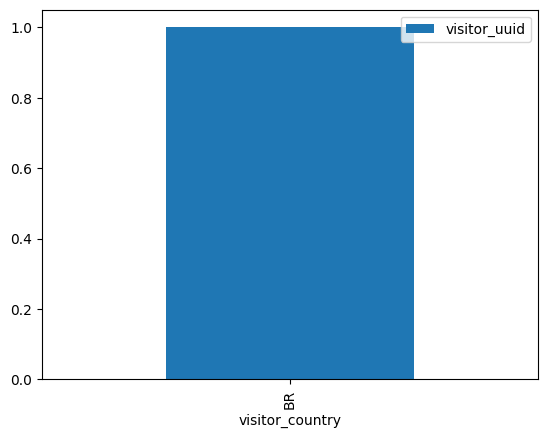

In [5]:
doc_by_country()

done...


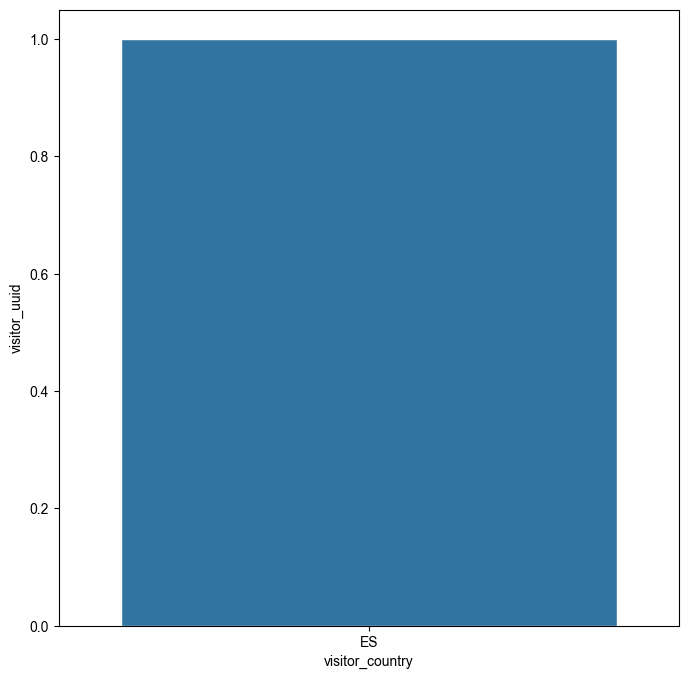

In [9]:
from doc import doc_by_country

chart = doc_by_country('140224195414-e5a9acedd5eb6631bb6b39422fba6798')

In [17]:
v = df_count['env_doc_id'].value_counts().reset_index()

In [27]:
s = v.iloc[0, 0]

In [29]:
len(s)

45

In [32]:
df['visitor_country'].value_counts().reset_index()
df['Continent'] = 'none'

In [34]:
df.loc[df['visitor_country'] == 'BR', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'US', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'MX', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'CA', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'GB', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'ES', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'PE', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'IT', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'CO', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'CL', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'AU', 'Continent'] = 'Australia & Oceania'
df.loc[df['visitor_country'] == 'AR', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'RU', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'FR', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'PT', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'PL', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'NL', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'SV', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'DE', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'EC', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'KR', 'Continent'] = 'Asia'
df.loc[df['visitor_country'] == 'GT', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'JP', 'Continent'] = 'Asia'
df.loc[df['visitor_country'] == 'UA', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'CR', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'IS', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'RS', 'Continent'] = 'Europe'


In [36]:
df['visitor_country'].value_counts().reset_index()

,index,visitor_country
0,US,1952
1,MX,1406
2,BR,1324
3,CA,505
4,GB,327
5,ES,290
6,PE,286
7,IT,279
8,CO,276
9,CL,248
